<a href="https://colab.research.google.com/github/zerlin0/pcvk/blob/main/pcvk10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

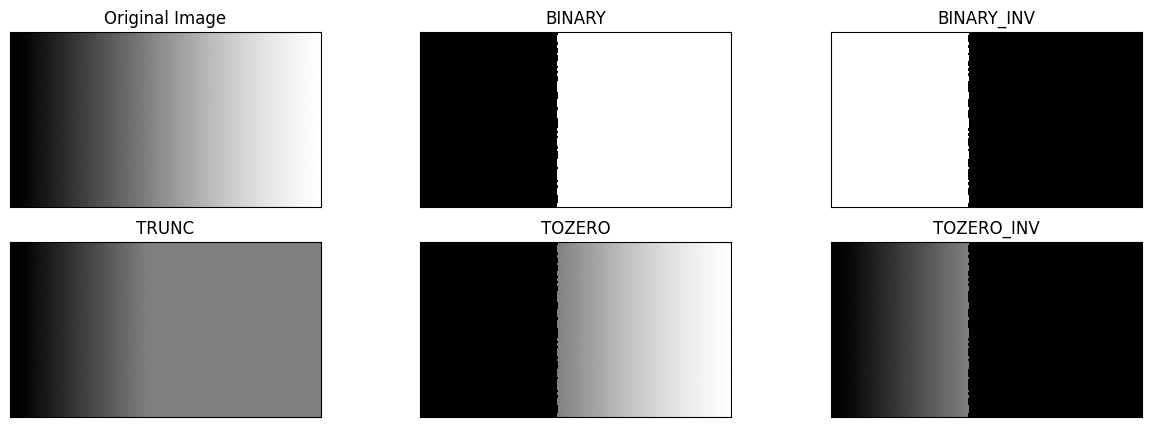

In [6]:
# Code Berikut menunjukkan penggunaan dari library OpenCV cv.Threshold

filename = ('/content/drive/MyDrive/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

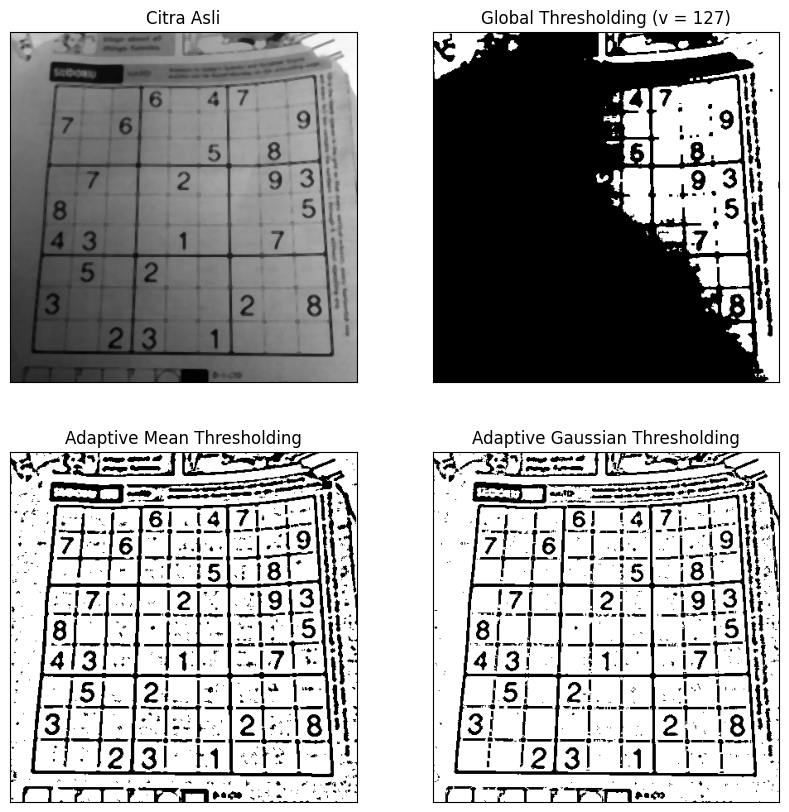

In [7]:
# Berikut adalah contoh code untuk Adaptive Threshold.

filename = ('/content/drive/MyDrive/Images/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()


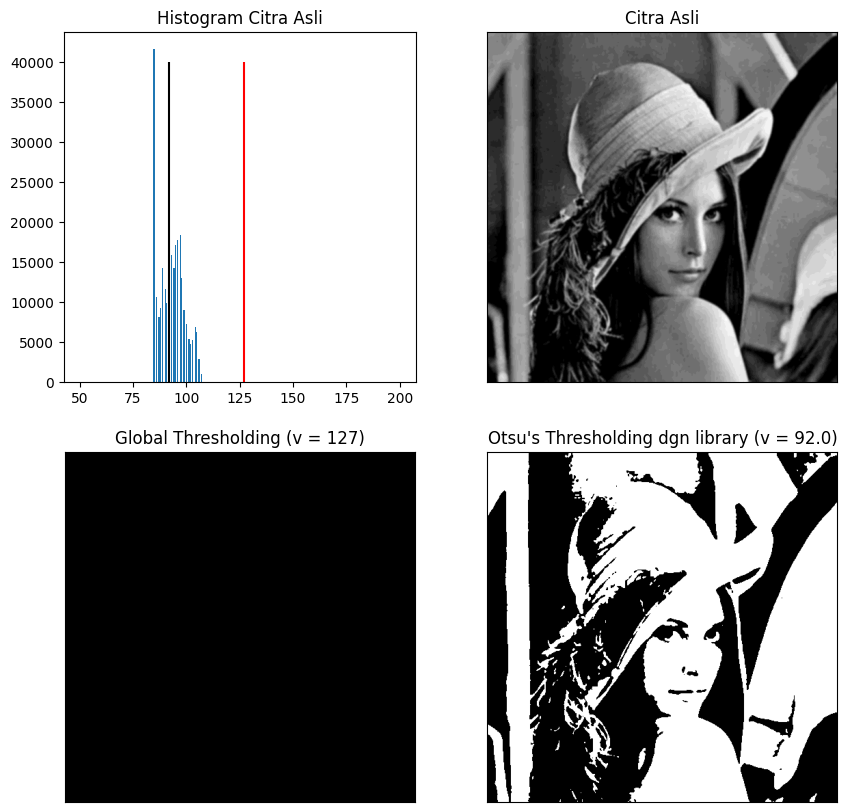

In [9]:
# Berikut adalah code contoh penggunaan Otsu’s dengan library OpenCV.

# Dengan Library
filename = ('/content/drive/MyDrive/Images/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

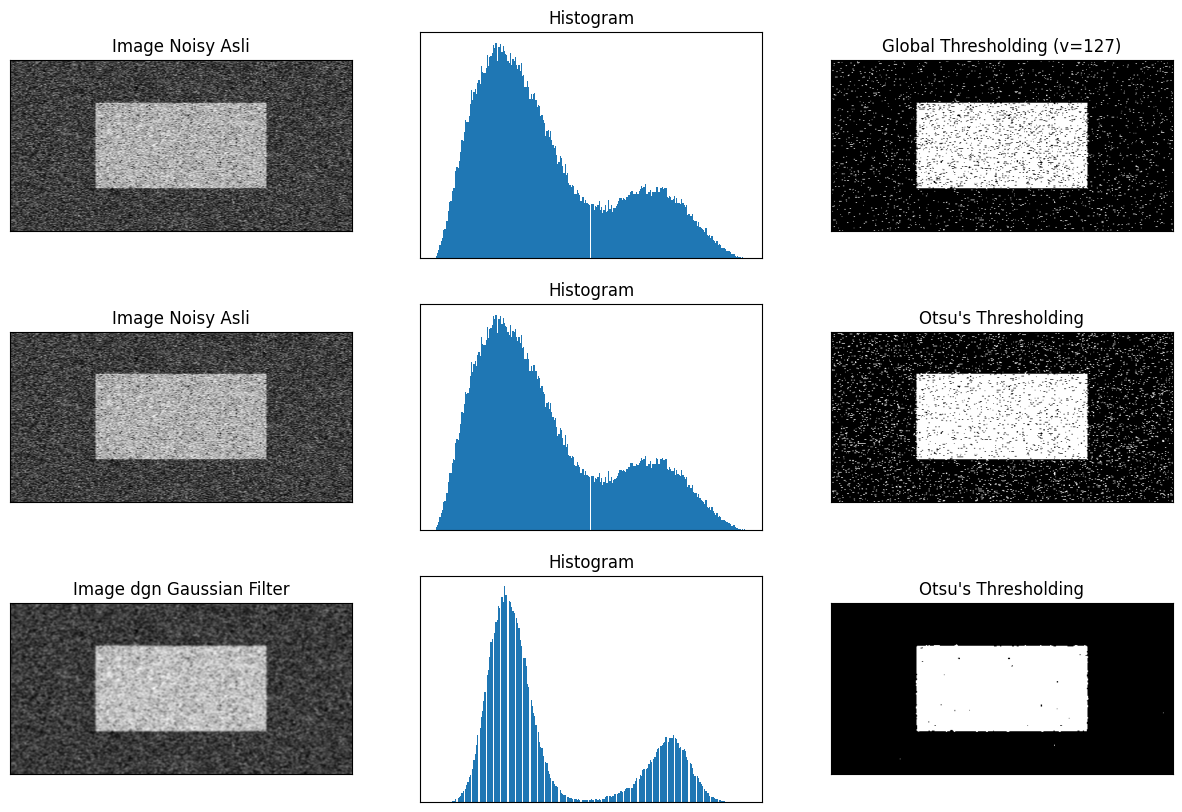

In [10]:
# Code berikut akan menampilkan hasil dari threshold Otsu’s tanpa Gaussian Filter dan dengan menggunakan Gaussian Filter.

filename = ('/content/drive/MyDrive/Images/noisy2.png')
img = cv.imread(filename,0)
#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
 'Image Noisy Asli','Histogram',"Otsu's Thresholding", 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7d190b0edc00>)

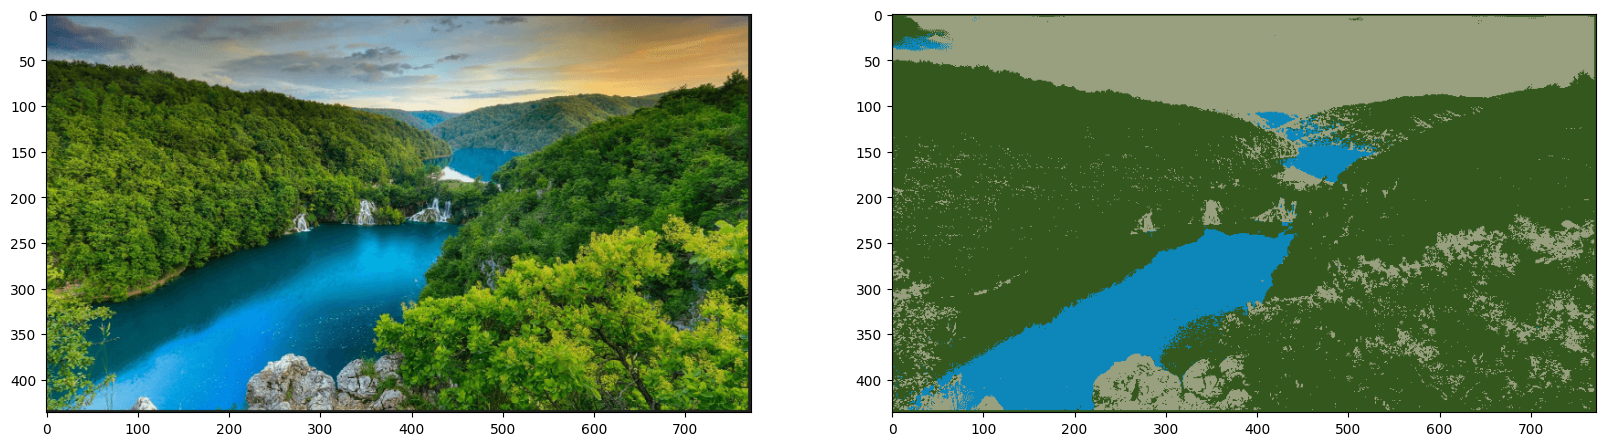

In [11]:
# Berikut adalah code untuk penggunaan K-Means pada segmentasi citra.

#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/Images/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan, sedangkan image aslinya adalah array 3D selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

(<Axes: >, <matplotlib.image.AxesImage at 0x7d1902e83d60>)

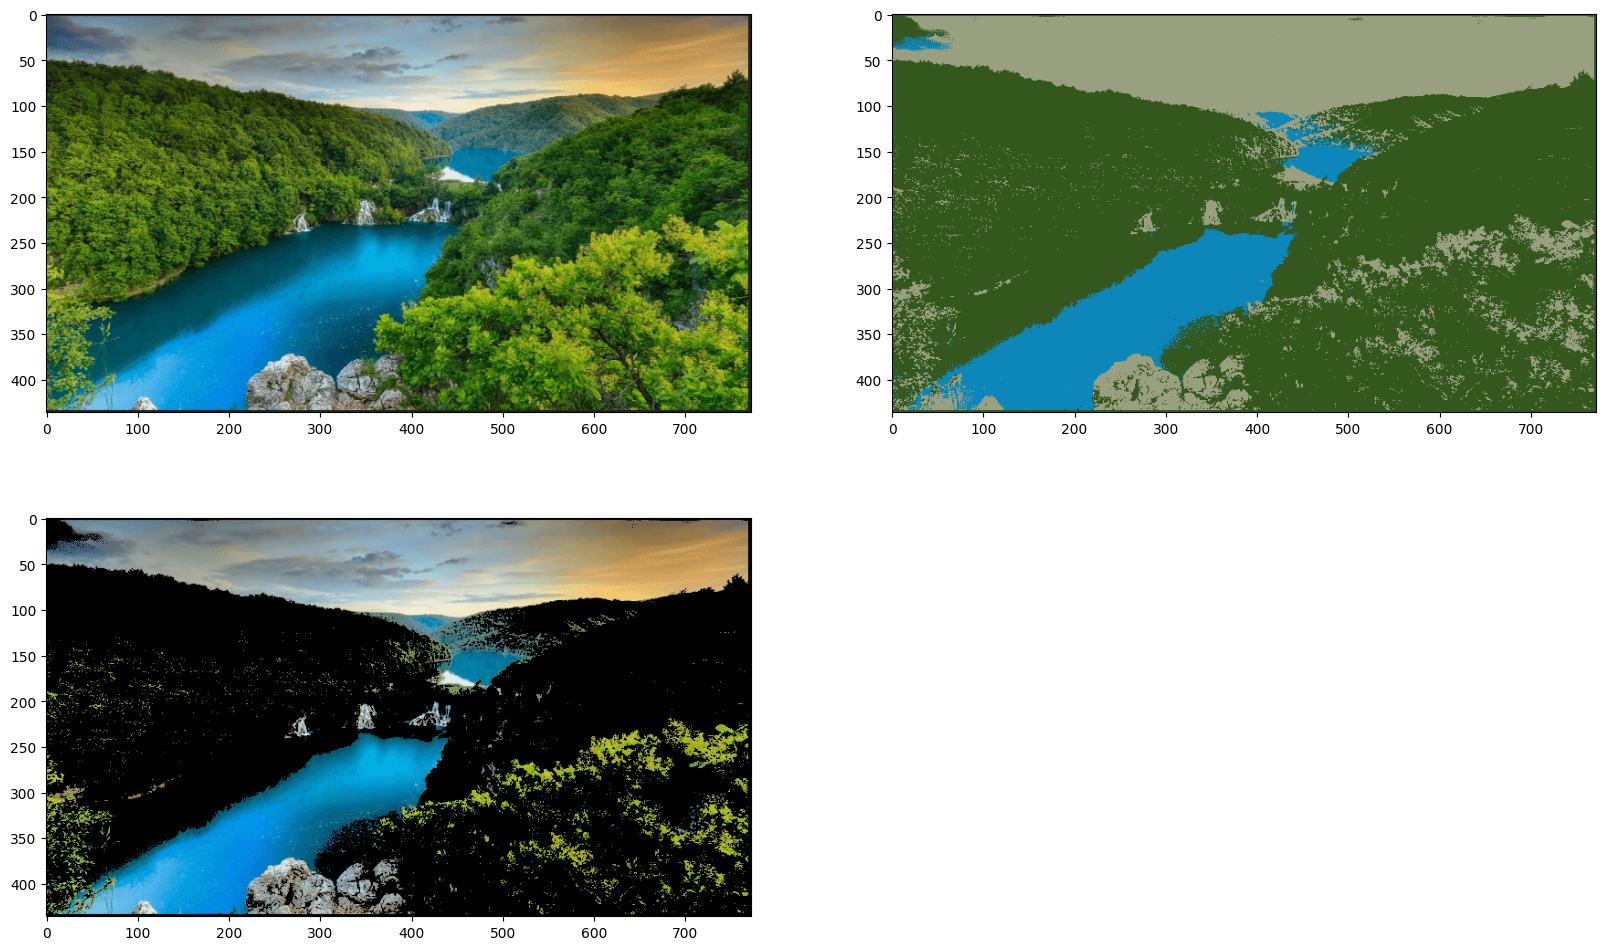

In [12]:
# Code berikut merupakan lanjutan dari code diatas yang digunakan untuk mengubah warna pada cluster tertentu.

#ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

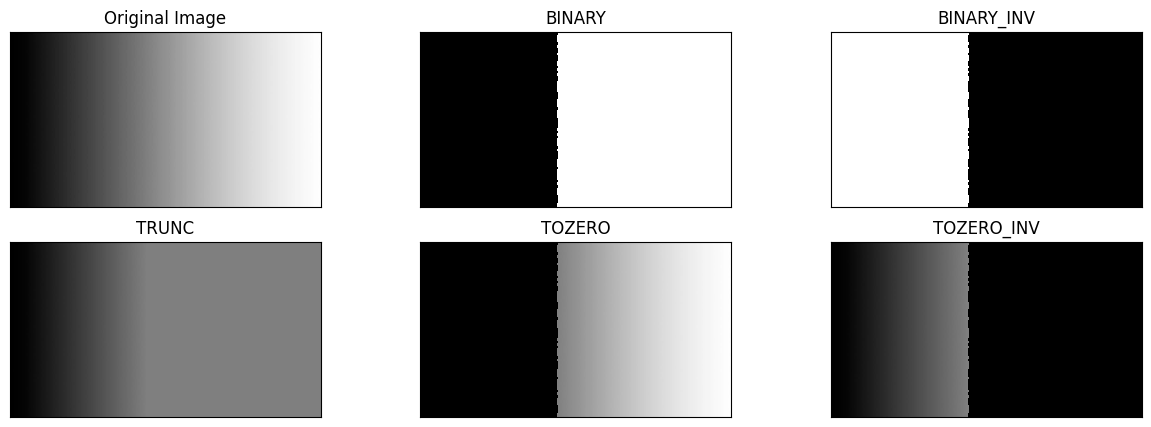

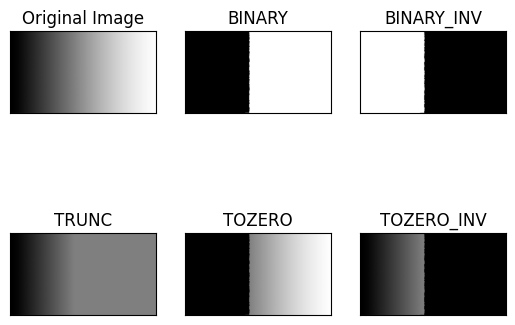

In [14]:
# No 3 tanpa menggunakan library
filename_1 = ('/content/drive/MyDrive/Images/gradient.jpg')
img_g = cv.imread(filename_1, 0)
thresh1 = cv.imread(filename_1)
thresh2 = cv.imread(filename_1)
thresh3 = cv.imread(filename_1)
thresh4 = cv.imread(filename_1)
thresh5 = cv.imread(filename_1)
thresh = 127    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#2. Binary threshold inverse
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3[img_g>thresh] = thresh
#4. Threshold Tozero
thresh4[img_g<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# menggunakan library
img_g = cv.imread(filename_1)
ret,thresh1 = cv.threshold(img_g,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img_g,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img_g,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img_g,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img_g,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

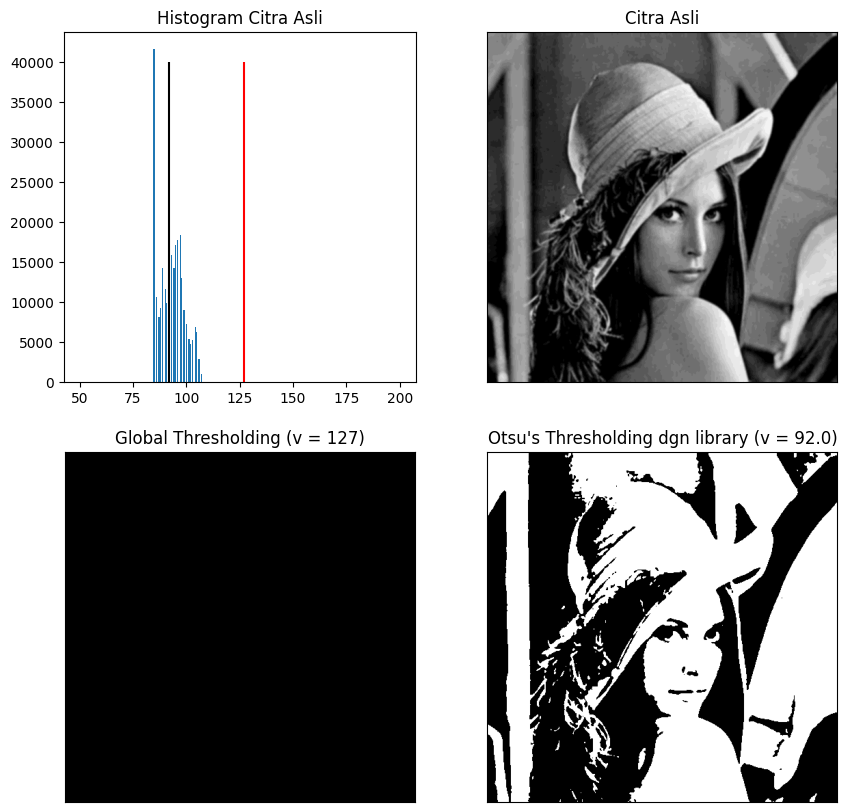

<ipython-input-15-7f2c472ca4ff>:45: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb
<ipython-input-15-7f2c472ca4ff>:46: RuntimeWarning: invalid value encountered in divide
  mf = (sumb - sumb)/wf


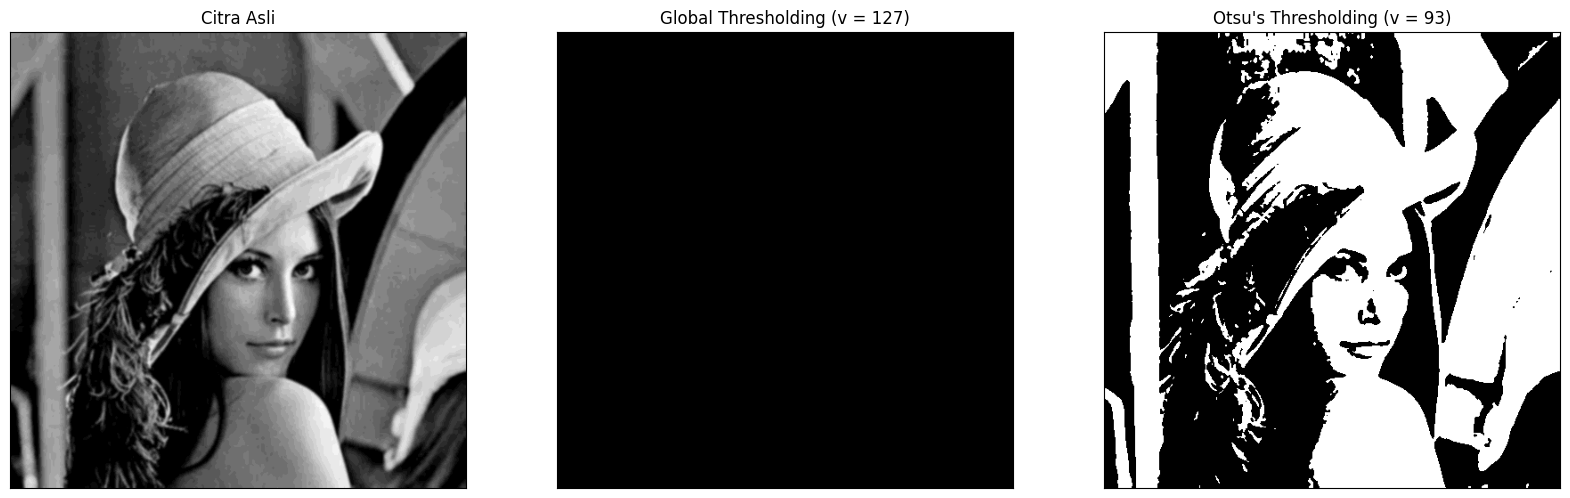

In [15]:
# No 4 menggunakan library
filename_2 = ('/content/drive/MyDrive/Images/lena_gs_lc2.jpg')
img_lgs = cv.imread(filename_2, 0)
blur = cv.GaussianBlur(img_lgs,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])

plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# tanpa menggunakan library
img_lgs = cv.imread(filename_2, 0)
blur = cv.GaussianBlur(img_lgs, (5,5),0)
hist = cv.calcHist([blur],[0],None,[256], [0,256])

hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0,255):
  wb += hist[i]
  wf = (img_lgs.shape[0]*img_lgs.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv.threshold(blur, 127, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blur, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

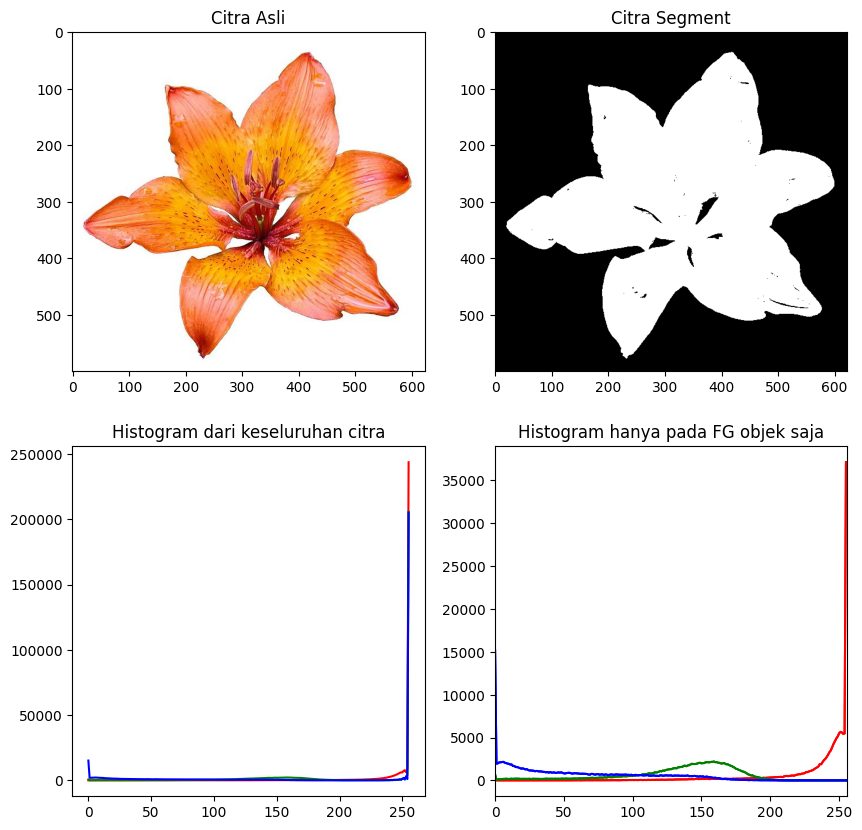

In [17]:
# No 5
filename_3 = ('/content/drive/MyDrive/Images/lily.jpg')
img_l = cv.imread(filename_3)
img_rgb = cv.cvtColor(img_l,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

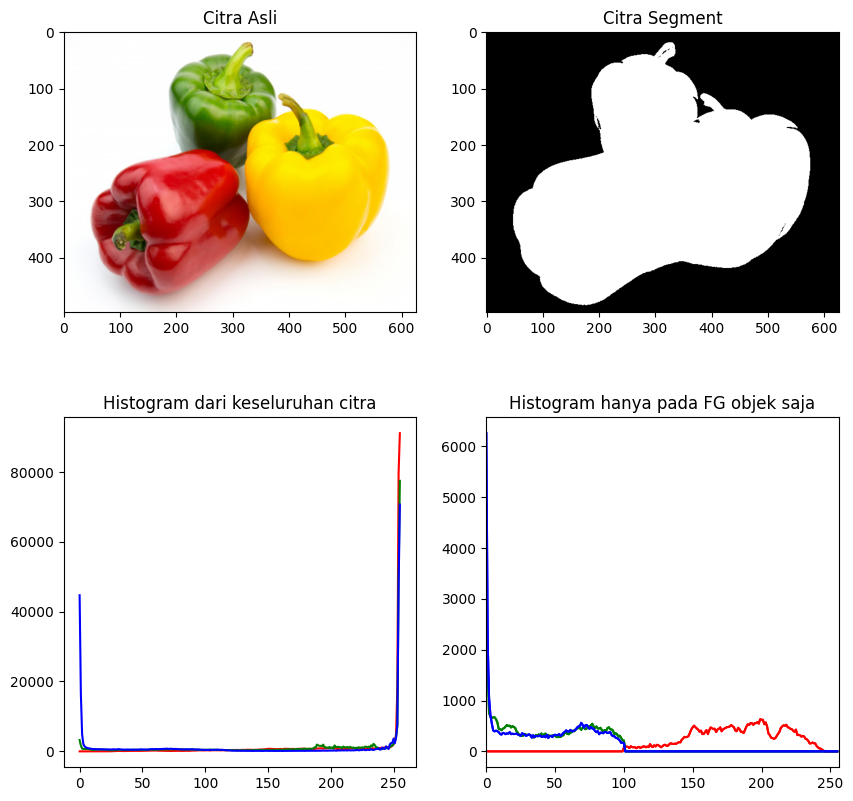

In [22]:
#no 6
filename_3 = ('/content/drive/MyDrive/Images/peppers.jpg')
img_l = cv.imread(filename_3)
img_rgb = cv.cvtColor(img_l,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

# Create a mask for the foreground (you may need to adjust the values)
lower_bound = np.array([0, 0, 100])
upper_bound = np.array([100, 100, 255])
mask = cv.inRange(img_l, lower_bound, upper_bound)

# Calculate the histogram of the masked region
hist = cv.calcHist([img_l], [0], mask, [256], [0, 256])

# Plot the histogram
#plt.plot(hist)
#plt.title('Histogram of Foreground')
#plt.xlabel('Pixel Value')
#plt.ylabel('Frequency')
#plt.show()


for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')

    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')

    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')

    plt.xlim([0,256])

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


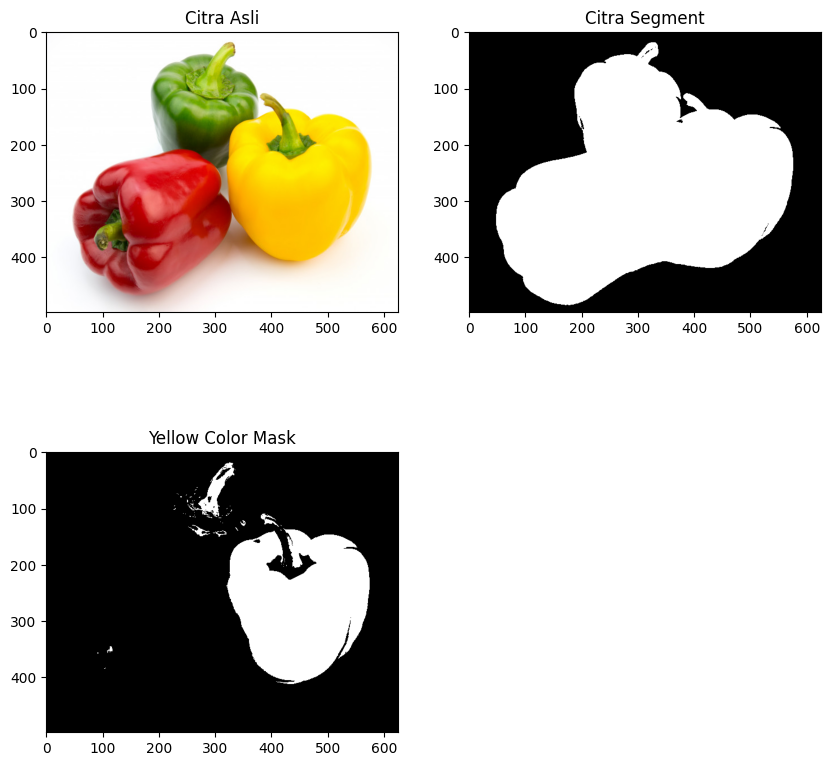

In [25]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

filename_3 = '/content/drive/MyDrive/Images/peppers.jpg'
img_l = cv.imread(filename_3)
img_rgb = cv.cvtColor(img_l, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
plt.title('Citra Segment')

# Perform K-Means clustering to segment yellow colors
reshaped_image = img_rgb.reshape((-1, 3))
kmeans = KMeans(n_clusters=2, random_state=0).fit(reshaped_image)

# Find the cluster center with the yellow color
yellow_center = kmeans.cluster_centers_[0] if np.sum(kmeans.cluster_centers_[0]) > np.sum(kmeans.cluster_centers_[1]) else kmeans.cluster_centers_[1]

# Create a mask for yellow colors with an appropriate color range
lower_bound = np.array([160, 160, 0])
upper_bound = np.array([255, 255, 100])
yellow_mask = cv.inRange(img_rgb, lower_bound, upper_bound)

plt.subplot(2, 2, 3), plt.imshow(yellow_mask, 'gray')
plt.title('Yellow Color Mask')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


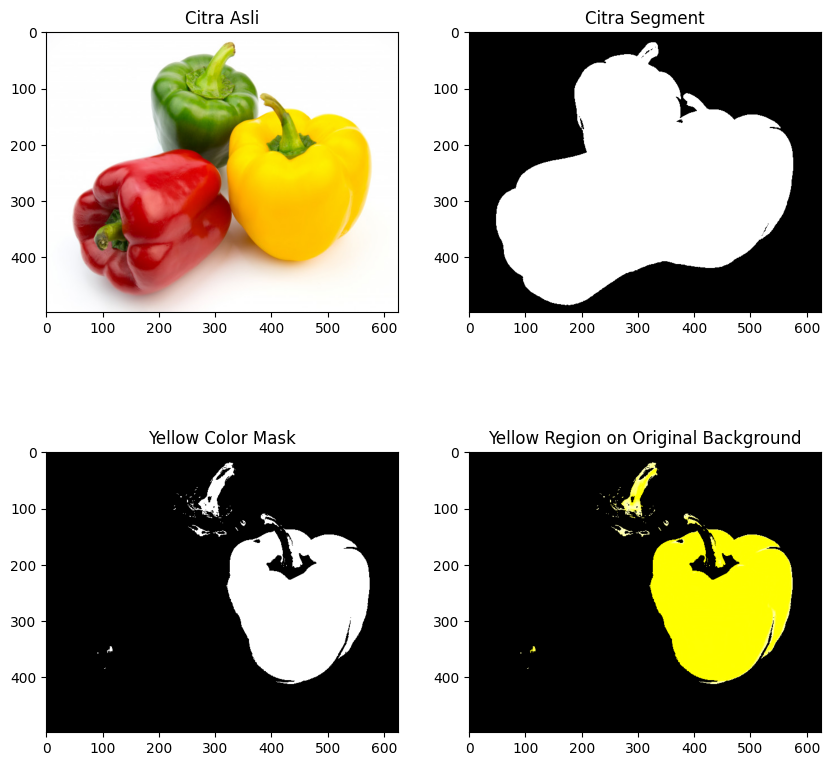

In [27]:
filename_3 = '/content/drive/MyDrive/Images/peppers.jpg'
img_l = cv.imread(filename_3)
img_rgb = cv.cvtColor(img_l, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
plt.title('Citra Segment')

# Perform K-Means clustering to segment yellow colors
reshaped_image = img_rgb.reshape((-1, 3))
kmeans = KMeans(n_clusters=2, random_state=0).fit(reshaped_image)

# Find the cluster center with the yellow color
yellow_center = kmeans.cluster_centers_[0] if np.sum(kmeans.cluster_centers_[0]) > np.sum(kmeans.cluster_centers_[1]) else kmeans.cluster_centers_[1]

# Create a mask for yellow colors with an appropriate color range
lower_bound = np.array([160, 160, 0])
upper_bound = np.array([255, 255, 100])
yellow_mask = cv.inRange(img_rgb, lower_bound, upper_bound)

# Extract the yellow region from the original image
yellow_region = cv.bitwise_and(img_rgb, img_rgb, mask=yellow_mask)

# Create a mask for non-yellow colors
non_yellow_mask = cv.bitwise_not(yellow_mask)

# Create a copy of the original image
original_background = img_rgb.copy()

# Set the non-yellow region in the copy to black
original_background[non_yellow_mask == 255] = [0, 0, 0]

# Combine the yellow region with the modified original background
result_image = cv.add(yellow_region, original_background)

plt.subplot(2, 2, 3), plt.imshow(yellow_mask, 'gray')
plt.title('Yellow Color Mask')
plt.subplot(2, 2, 4), plt.imshow(result_image)
plt.title('Yellow Region on Original Background')

plt.show()


#no 6
When you display a certain color, explain the problem you are facing and why it happened.

1. **Color Range Selection**: The primary issue could be related to the selection of the color range to identify yellow. If the lower_bound and upper_bound values are not set correctly, it might not accurately identify the yellow color in the image. Adjust these values to capture the desired yellow color range in your image.

2. Image Format: Make sure the input image is in the correct format. The code assumes that you have a valid image file at the specified path.

3. Library and Module Imports: Ensure that you have imported the necessary libraries and modules, including OpenCV (cv2) and scikit-learn (sklearn.cluster.KMeans), as mentioned in the code. A "NameError" can occur if these libraries are not imported correctly.

4. Color Space: If the image is in a different color space or has unusual lighting conditions, it may affect color segmentation results. You might need to convert the image to a suitable color space before segmentation.

5. Resolution: If the image resolution is too high or too low, it can affect color segmentation results. Ensure that the image resolution is appropriate for the color range you are trying to segment.

6. Image Quality: Poor image quality, noise, or artifacts can also affect color segmentation. Preprocessing the image to reduce noise or improve its quality may help.

7. Algorithm Parameters: Adjust the parameters of the K-Means clustering algorithm as needed. For example, you can change the number of clusters (n_clusters) to better suit your image's color distribution.

8. Error Handling: Implement error handling to catch any exceptions that might occur during the execution of the code.

Saving female.tiff to female.tiff


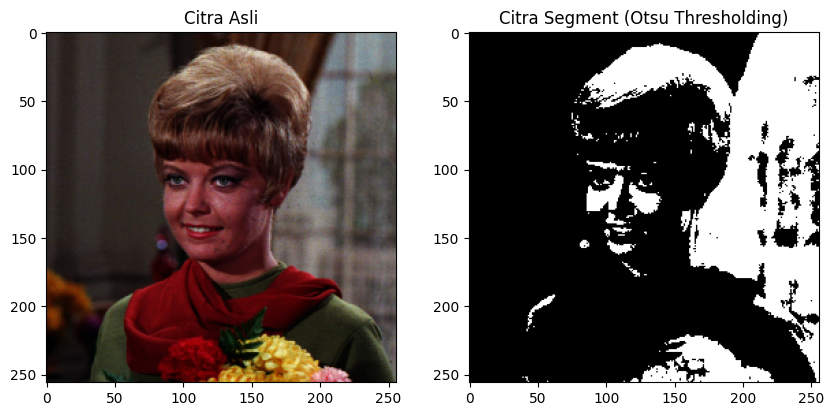

In [31]:
#no 7

import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload the image to your Colab environment
uploaded = files.upload()

# Load the uploaded image
for filename in uploaded.keys():
    img_l = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img_l, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
_, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and thresholded images
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
plt.title('Citra Segment (Otsu Thresholding)')

plt.show()
